# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [2]:
import pandas as pd

df = pd.read_csv('mpg.csv')

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### 2.2 Xóa các dòng không có dữ liệu


In [3]:
df = df.dropna()

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [4]:
# In ra kết quả trung bình và trung vị

print("Trung bình:\n", df[['cylinders','horsepower','weight']].mean())

print("\nTrung vị:\n", df[['cylinders','horsepower','weight']].median())

Trung bình:
 cylinders        5.471939
horsepower     104.469388
weight        2977.584184
dtype: float64

Trung vị:
 cylinders        4.0
horsepower      93.5
weight        2803.5
dtype: float64


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [5]:
import pandas as pd

# Đọc dữ liệu từ file csv vào DataFrame
df = pd.read_csv('mpg.csv')

# Tính miền giá trị của cột 'mpg'
min_df_mpg = df['mpg'].min()
max_df_mpg = df['mpg'].max()
print('Miền giá trị:', max_df_mpg - min_df_mpg)

# Tính miền phân vị của cột 'mpg'
mpg_quartiles = df['mpg'].quantile([0.25, 0.75])
mpg_iqr = mpg_quartiles[0.75] - mpg_quartiles[0.25]
print("Miền phân vị (IQR) của 'mpg':", mpg_iqr)


Miền giá trị: 37.6
Miền phân vị (IQR) của 'mpg': 11.5


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [6]:
muc_tieu_hao_ngl = df.groupby('origin')['mpg'].mean()

print(muc_tieu_hao_ngl)

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64


## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

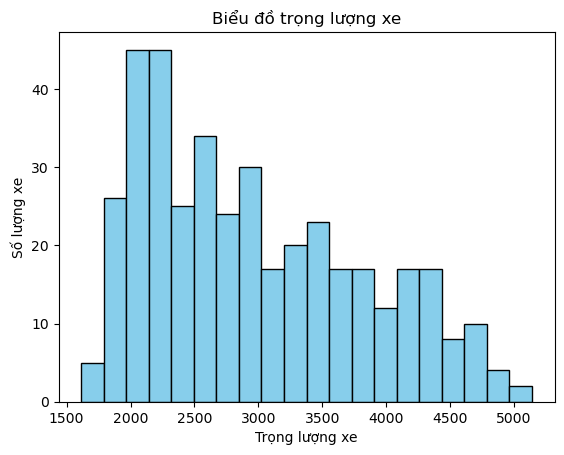

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['weight'], color ='skyblue', bins = 20, edgecolor = 'black')

plt.title('Biểu đồ trọng lượng xe')
plt.xlabel('Trọng lượng xe')
plt.ylabel('Số lượng xe')

plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [8]:
origin_counts = df['origin'].value_counts()

ti_le_dua_tren_xuat_xu = origin_counts/ origin_counts.sum()

print('Tỉ lệ các dòng xe dựa trên xuất xứ:\n',ti_le_dua_tren_xuat_xu)

Tỉ lệ các dòng xe dựa trên xuất xứ:
 origin
usa       0.625628
japan     0.198492
europe    0.175879
Name: count, dtype: float64


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

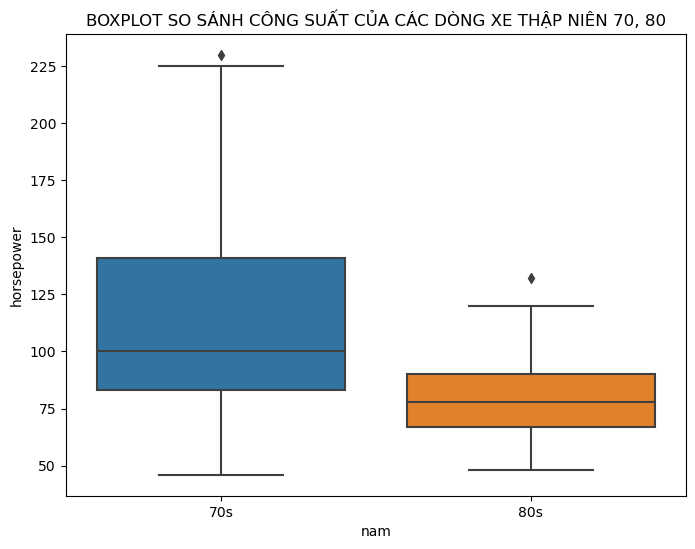

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# df = pd.read_csv('mpg.csv')

# df_70s_80s = df[df['model_year'].isin([70, 71, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])]

# # Vẽ boxplot so sánh công suất của các dòng xe thập niên 70 và 80
# plt.figure(figsize=(10, 6))

# plt.boxplot([df_70s_80s[df_70s_80s['model_year'] < 80]['horsepower'], 
#              df_70s_80s[df_70s_80s['model_year'] >= 80]['horsepower']],
#             labels=['70s', '80s'])
# plt.title('Boxplot so sánh công suất của các dòng xe thập niên 70 và 80')
# plt.xlabel('Thập niên')
# plt.ylabel('Công suất')
# plt.show()
# # todo: Chưa làm được

bins=[70,80,np.inf]
labels=['70s','80s']
df['nam']=pd.cut(df['model_year'],bins=bins,labels=labels,right=False)
df_nam=df[df['nam'].isin(['70s','80s'])]
plt.figure(figsize=(8,6))
sns.boxplot(x='nam',y='horsepower',data=df_nam)
plt.title('BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80')
plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

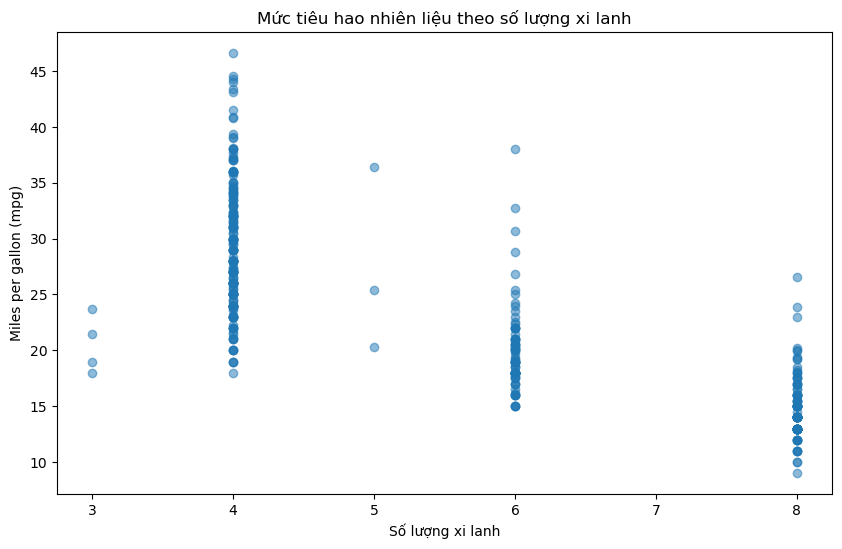

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file csv vào DataFrame
df = pd.read_csv('mpg.csv')

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cylinders'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu theo số lượng xi lanh')
plt.xlabel('Số lượng xi lanh')
plt.ylabel('Miles per gallon (mpg)')
plt.show()


### 7.2 Với công suất theo mã lực

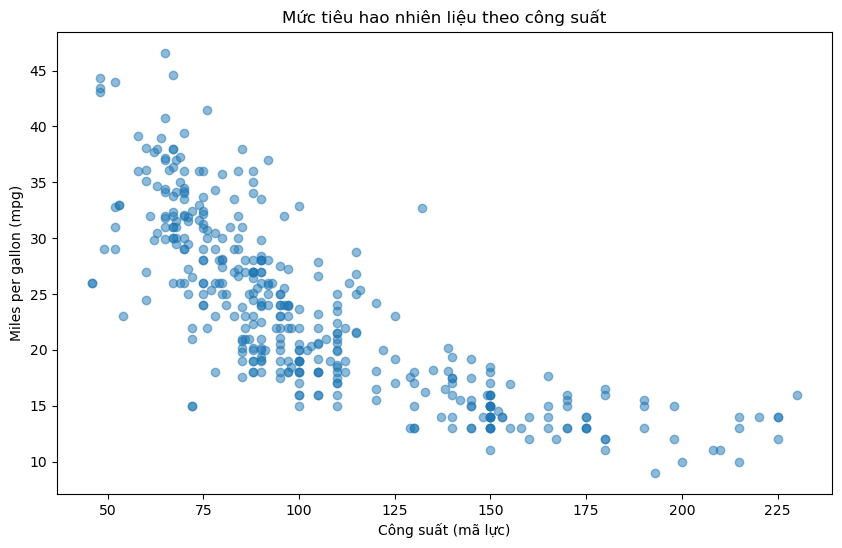

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file csv vào DataFrame
df = pd.read_csv('mpg.csv')

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu theo công suất')
plt.xlabel('Công suất (mã lực)')
plt.ylabel('Miles per gallon (mpg)')
plt.show()


### 7.3 Với gia tốc

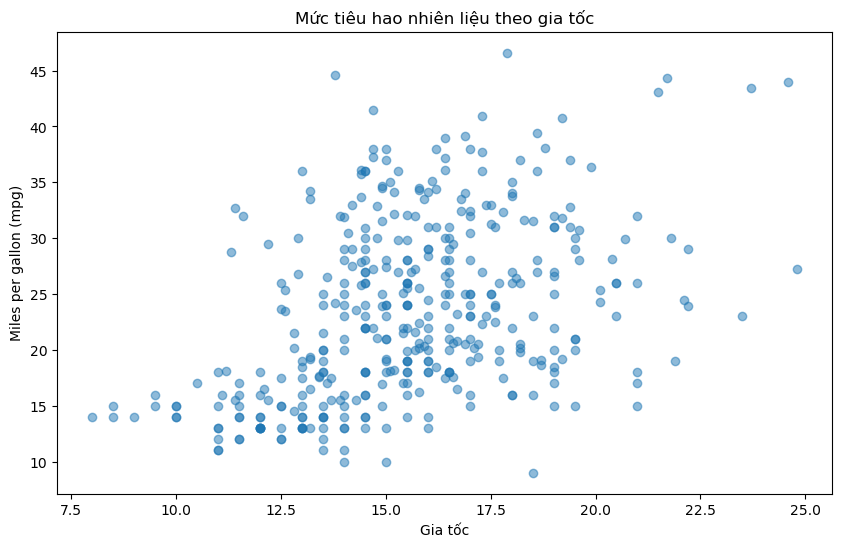

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file csv vào DataFrame
df = pd.read_csv('mpg.csv')

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['acceleration'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu theo gia tốc')
plt.xlabel('Gia tốc')
plt.ylabel('Miles per gallon (mpg)')
plt.show()


### 7.4 Với năm sản xuất

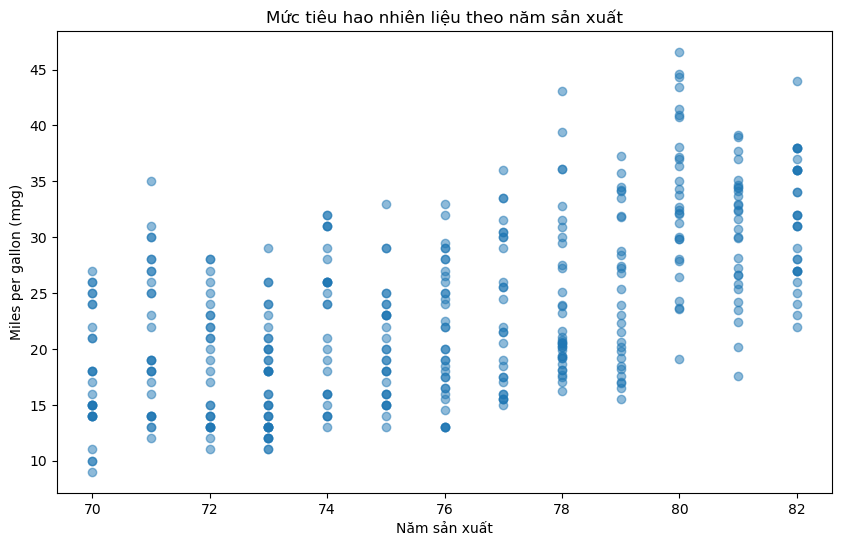

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file csv vào DataFrame
df = pd.read_csv('mpg.csv')

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['model_year'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu theo năm sản xuất')
plt.xlabel('Năm sản xuất')
plt.ylabel('Miles per gallon (mpg)')
plt.show()
